In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[11.3694196 , -2.5535384 ],
       [ 2.48111626,  7.61217583],
       [-3.34043969,  8.7512452 ],
       ...,
       [-3.5092945 ,  4.24525398],
       [ 3.21991737,  6.39151459],
       [ 9.75256028, -4.44690473]], shape=(1000, 2))

In [4]:
y

array([2, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 2,
       1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2,
       2, 1, 0, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2,
       2, 0, 1, 1, 2, 2, 0, 0, 2, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 1,
       2, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 1,
       1, 2, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 1, 1,
       1, 2, 2, 1, 0, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 2, 1, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 1, 0, 2, 0,
       2, 2, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1,

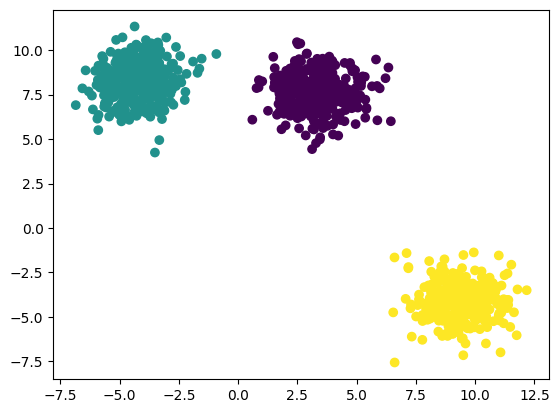

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [9]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

In [11]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[1340.0000000000011,
 243.29117221632106,
 42.93401442535,
 37.01408082627513,
 32.34447845335399,
 28.129597701595166,
 25.409728022404245,
 23.801135554986743,
 19.802414124385866,
 18.10741933682547]

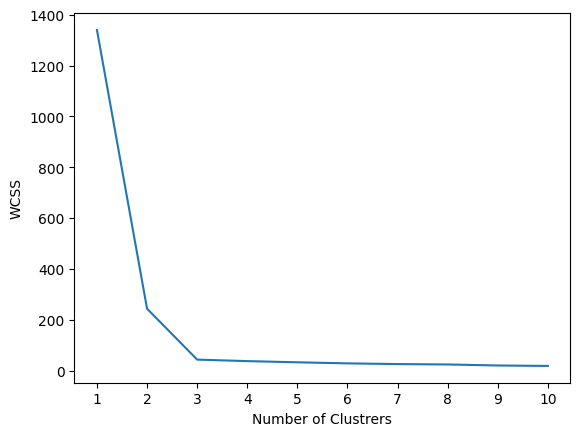

In [13]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [15]:
kmeans.fit_predict(X_train_scaled)

array([1, 2, 1, 2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 2, 1,
       0, 2, 1, 2, 2, 0, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 2,
       1, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0,
       2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 1, 0, 0, 2, 1, 2, 0, 2, 1, 2, 0,
       1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 0, 2,
       0, 2, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 2,
       1, 0, 2, 1, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 1, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 2, 0, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 0, 0, 2, 1, 2, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 0, 2,
       1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       1, 0, 0, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 1,
       0, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0,

In [16]:
y_pred=kmeans.predict(X_test_scaled)

In [17]:
y_pred

array([0, 0, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 1, 1, 0,
       1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0,
       1, 2, 0, 0, 2, 1, 1, 2, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 1, 2, 1, 2,
       0, 1, 1, 2, 0, 2, 2, 0, 1, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 1, 2, 2,
       1, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 2, 0, 2,
       2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 1,
       0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 2, 2, 1, 0, 2,
       2, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1,
       0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0,

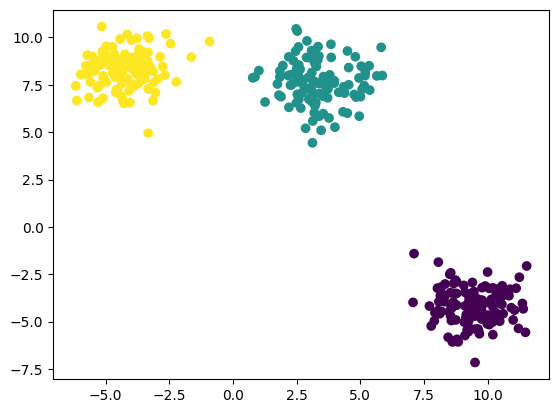

In [18]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [19]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [19]:
## kneelocator
!pip install kneed


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from kneed import KneeLocator

In [21]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [22]:
kl.elbow

np.int64(3)

In [23]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [24]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [26]:
silhouette_coefficients

[0.7526367077572678,
 0.7957616624805482,
 0.6547577732815691,
 0.4977034496977808,
 0.31437969906882635,
 0.3222558169156503,
 0.33036604035680517,
 0.3293774105047836,
 0.3091503150237089]

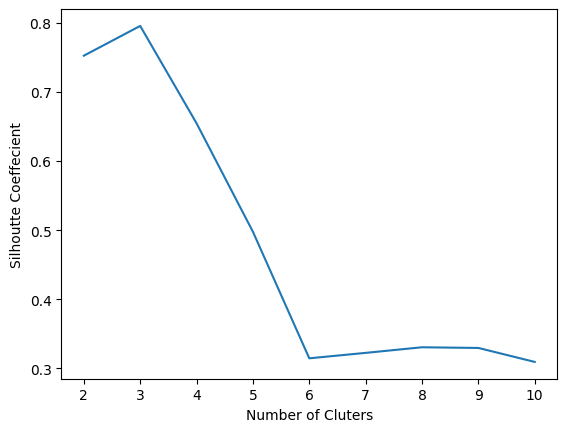

In [27]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()